In [1]:
from units import *
import matplotlib.pyplot as plt
from astrometry_sim import QuasarSim
import healpy as hp
from pylab import cm
from estimator_wholesky import get_vector_alm
from tqdm import *
import numpy as np

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
def cov_mat(ell, C_l, N_l, fsky=0.5):
    return 1/((2*ell+1)*fsky)*(2*(C_l + N_l)**2)

def likelihood(C_l_data, C_l_theta, cov_mat_theta):
    dC_l_theta = np.sqrt(cov_mat_theta)
    return np.sum(-0.5*((C_l_data - C_l_theta)/dC_l_theta)**2)

In [4]:
nside = 128

omega_pix = hp.nside2pixarea(nside)

noise_per_object = 1*1e-6 # in as/yr
objects_per_area = 1e9*0.01
objects_per_pixel = objects_per_area * omega_pix
mu_noise = noise_per_object/np.sqrt(objects_per_pixel) 

0.1 1.9148723310301635e-14
0.2 1.4574829943356883e-13
0.30000000000000004 7.919639080939441e-14
0.4 2.444212738090603e-12
0.5 7.21580896659069e-13
0.6 5.243763566162439e-12
0.7000000000000001 3.803336046118215e-13
0.8 1.5901006125335067e-12
0.9 4.962202358284641e-13


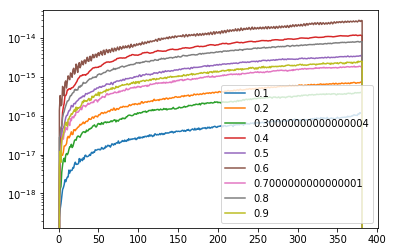

In [328]:
m = 8
nmc = 6
for baseline_frac in np.arange(0.1,1.0,0.1):
    Cl_ary = []
    for imc in range(nmc):
        C_l = np.load("/scratch/sm8383/QuasarSims/uniform_log10M_"+str(m)+ ".0_mfrac_"+str(baseline_frac)[:3]+"_mc_"+str(imc)+".npz")['Cl_B']
        Cl_ary.append(C_l)
    ell = np.arange(len(C_l))
    plt.plot(ell, np.mean(Cl_ary, axis=0), label=baseline_frac)
    print(baseline_frac, np.sum(np.mean(Cl_ary, axis=0)))
plt.yscale("log")
plt.legend()

0.6971417088292546
1.0300405025081256
0.9348504396598555
1.05379369143357
0.9313373739550076
1.1022751600188094
1.0464281937749313
0.9261583650402541


No handles with labels found to put in legend.


0.9975792760334098


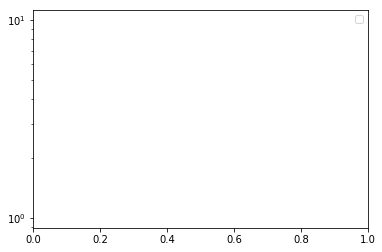

In [5]:
m = 8
for baseline_frac in np.arange(0.1,1.0,0.1):
    imc = 1
    C_l = np.load("/scratch/sm8383/QuasarSims/uniform_log10M_"+str(m)+ ".0_mfrac_"+str(baseline_frac)[:3]+"_mc_"+str(imc)+".npz")['vel_lens']
    print(np.var(C_l))
plt.yscale("log")
plt.legend()

A Jupyter Widget

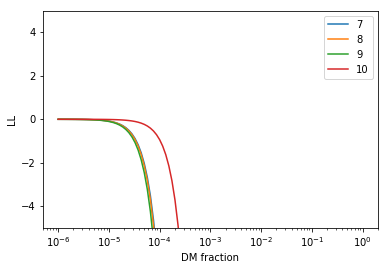

In [6]:
lmin = 200
lmax = 300
# for baseline_frac in tqdm_notebook(np.arange(0.1,0.4,0.1)):
for baseline_frac in [0.4]:
    for m in tqdm_notebook(range(7,11)):
        nmc = 10

        C_l_ary = []
        for imc in range(nmc):
            C_l = np.load("/scratch/sm8383/QuasarSims/uniform_log10M_"+str(m)+ ".0_mfrac_"+str(baseline_frac)[:3]+"_mc_"+str(imc)+".npz")['Cl_B']
        #     C_l = np.load("/scratch/sm8383/QuasarSims/lcdm/uniform_lcdm_mmin_1e6_mc_" + str(imc) + ".npz")['Cl_B']
            C_l_ary.append(C_l)

        C_l = np.mean(C_l_ary, axis = 0)
        ell = np.arange(len(C_l))
        C_l /= (2*ell+1)
        C_l = C_l[lmin:lmax]
        ell = ell[lmin:lmax]

        N_l = mu_noise**2*omega_pix*np.ones_like(C_l)

        LL = []
        frac_scale = np.logspace(np.log10(1e-6), np.log10(1.),100)*(1/baseline_frac)
        frac = frac_scale*baseline_frac
        for i in frac_scale:
            LL.append(2*likelihood(N_l, i*C_l + N_l, cov_mat(ell, i*C_l, N_l)))

        plt.plot(frac, LL, label=str(m))
        plt.ylim(-5,5)
        plt.xscale("log")
        plt.xlabel("DM fraction")
        plt.ylabel("LL")
plt.legend()

In [166]:
frac_scale

array([1.00000000e-06, 1.14975700e-06, 1.32194115e-06, 1.51991108e-06,
       1.74752840e-06, 2.00923300e-06, 2.31012970e-06, 2.65608778e-06,
       3.05385551e-06, 3.51119173e-06, 4.03701726e-06, 4.64158883e-06,
       5.33669923e-06, 6.13590727e-06, 7.05480231e-06, 8.11130831e-06,
       9.32603347e-06, 1.07226722e-05, 1.23284674e-05, 1.41747416e-05,
       1.62975083e-05, 1.87381742e-05, 2.15443469e-05, 2.47707636e-05,
       2.84803587e-05, 3.27454916e-05, 3.76493581e-05, 4.32876128e-05,
       4.97702356e-05, 5.72236766e-05, 6.57933225e-05, 7.56463328e-05,
       8.69749003e-05, 1.00000000e-04, 1.14975700e-04, 1.32194115e-04,
       1.51991108e-04, 1.74752840e-04, 2.00923300e-04, 2.31012970e-04,
       2.65608778e-04, 3.05385551e-04, 3.51119173e-04, 4.03701726e-04,
       4.64158883e-04, 5.33669923e-04, 6.13590727e-04, 7.05480231e-04,
       8.11130831e-04, 9.32603347e-04, 1.07226722e-03, 1.23284674e-03,
       1.41747416e-03, 1.62975083e-03, 1.87381742e-03, 2.15443469e-03,
      